<a href="https://colab.research.google.com/github/Charan-1111/DigitClassification/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import seaborn as sns
import matplotlib.pyplot as plt
#dir(datasets)

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
initial_df = pd.DataFrame(digits.data, columns=digits.feature_names)
initial_df['target'] = digits.target

# as the data feature of the digits only contains data values and target contains target values we are creating dataframe by concatinating both

In [4]:
initial_df.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [5]:
initial_df.tail(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


# **EDA**

In [6]:
initial_df.shape

(1797, 65)


dataset contains 1797 rows and 65 columns in which 64 are independent features and 1 is dependent features

In [7]:
arr = initial_df['target'].unique()

arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

clearly there are 10 different classes of digits

In [8]:
# checking for null values
null_df = initial_df.isna().sum()
null_df

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [9]:
null_df.unique()

array([0])

as 0 is the only unique value we can conclude that there are no null values in the dataset

In [10]:
for i in range(10):
  temp_df = initial_df[initial_df.target == i]
  len = temp_df.shape[0]
  print(i, "-->", len)

0 --> 178
1 --> 182
2 --> 177
3 --> 183
4 --> 181
5 --> 182
6 --> 181
7 --> 179
8 --> 174
9 --> 180


clearly every digit has reasonable count values

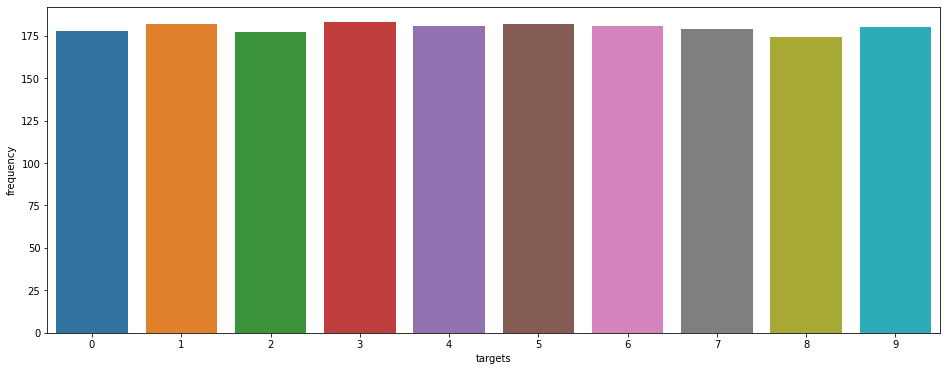

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(x='target', data=initial_df)
plt.xlabel('targets')
plt.ylabel('frequency')

plt.show()

# **Splitting the dataset**

In [12]:
X = initial_df.drop('target', axis=1)
y = initial_df['target']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
print(x_train.shape[0], y_train.shape[0])

1257 1257


# **Model Building**

### **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
lr_pred = lr_classifier.predict(x_test)

In [17]:
lr_classifier.score(x_test, y_test)

0.9537037037037037

In [18]:
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  2, 49,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 51,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 53,  4],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 55]])

In [19]:
from sklearn import metrics
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 '

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test, lr_pred)
mcm

array([[[495,   0],
        [  0,  45]],

       [[482,   6],
        [  3,  49]],

       [[486,   1],
        [  4,  49]],

       [[483,   3],
        [  2,  52]],

       [[491,   1],
        [  1,  47]],

       [[482,   1],
        [  2,  55]],

       [[480,   0],
        [  1,  59]],

       [[486,   1],
        [  2,  51]],

       [[475,   4],
        [  8,  53]],

       [[475,   8],
        [  2,  55]]])

### **Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier()
dtc_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
dtc_pred = dtc_classifier.predict(x_test)

In [23]:
dtc_score = dtc_classifier.score(x_test, y_test)
print(dtc_score)

0.8574074074074074


In [24]:
from sklearn.metrics import multilabel_confusion_matrix
mcm2 = multilabel_confusion_matrix(y_test, dtc_pred)
mcm2

array([[[488,   7],
        [  3,  42]],

       [[477,  11],
        [  7,  45]],

       [[482,   5],
        [ 10,  43]],

       [[470,  16],
        [  5,  49]],

       [[487,   5],
        [  4,  44]],

       [[480,   3],
        [  9,  48]],

       [[478,   2],
        [  6,  54]],

       [[480,   7],
        [  5,  48]],

       [[471,   8],
        [ 19,  42]],

       [[470,  13],
        [  9,  48]]])

### **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators=100)
rfc_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
rfc_pred = rfc_classifier.predict(x_test)

In [27]:
rfc_score = rfc_classifier.score(x_test, y_test)
print(rfc_score)

0.9796296296296296


### **SVM**

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [29]:
svc_pred = svc.predict(x_test)

In [30]:
svc_score = svc.score(x_test, y_test)
print(svc_score)

0.9907407407407407


### **Naive Bayes*

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [32]:
nb_pred = nb_clf.predict(x_test)

In [33]:
nb_score = nb_clf.score(x_test, y_test)
print(nb_score)

0.8240740740740741


From the above we can see that SVM and Random Forest performs well the dataset
with the scores
SVM - 99.07
Random Forest - 97.96

## **Hyper Parameter Tuning**

### **Tuning SVM model**

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel' : ('linear', 'poly', 'rbf'),
    'gamma' : ('scale', 'auto'),
    'C' : [1, 10, 100]
}

grid_cv = GridSearchCV(svc, parameters)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')})

In [49]:
grid_cv.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [50]:
grid_cv.best_estimator_

SVC(C=10)

In [51]:
grid_cv.score(x_test, y_test)

0.9925925925925926

In [52]:
rfc = RandomForestClassifier()

params = {
    'n_estimators' : [1, 10, 50, 100],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

grid_cv = GridSearchCV(
    rfc,
    param_grid = params
)


In [53]:
grid_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 10, 50, 100]})

In [54]:
grid_cv.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [55]:
grid_cv.score(x_test, y_test)

0.9814814814814815

We can see that after tuning SVM gives the score of 99.25 and RandomForest give the score of 98.14


so we can use SVM model